# 데이터 분석 개요

- 게임에 유행하는 장르가 있는지
- 나라마다 선호하는 장르가 다른지
- top5에 해당하는 게임은 어떤 게임들인지 알아보고자 함. 

# 데이터 분석
## 게임 시장 전체에 대한 분석
- 게임 시장의 전반적인 상황에 대해 알아보고자 함. 
- 2010년까지 성장하던 게임 시장은 이후 가파르게 하락하는 모습을 보임. 

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [193]:
# 전처리를 완료한 파일을 불러옴

df = pd.read_csv('vgames2_cleaned.csv', sep =',')
df = df[~(df.Year.isin([1974, 2017, 2020]))]
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Glo_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


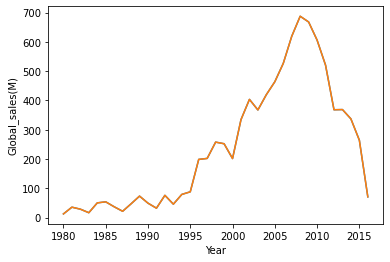

In [200]:
# 매년 총 게임 매출량을 알아봄. 
df_sales = df.groupby('Year').Glo_Sales.sum()
plt.plot(df_sales)
plt.xlabel('Year')
plt.ylabel('Global_sales(M)')
plt.plot(df_sales)
plt.show();

## 게임 트랜드 파악
### 매해 장르별 판매량으로 유행 장르 알아보기
- 시장이 변동이 심해 단순 판매량의 합으로는 정확히 유행하는 장르가 무엇인지 알기 힘듬.
- 매해 총 판매량을 기준으로 장르별 차지하는 비율을 통해 유행 장르를 알아볼 필요가 있음. 

In [20]:
# 매해 장르별 판매량을 통해 파악
df_gy = df.pivot_table(index='Year', columns='Genre', values = 'Glo_Sales', 
               aggfunc = 'sum')
df_gy.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,0.34,1.3,0.77,2.70,NaN,NaN,NaN,NaN,7.07,NaN,0.50,NaN
1981.0,14.79,NaN,NaN,NaN,6.92,2.25,0.48,NaN,10.02,0.44,0.78,NaN
1982.0,6.50,NaN,NaN,0.87,5.03,10.04,1.57,NaN,3.81,NaN,1.06,NaN
1983.0,2.86,0.4,NaN,2.14,6.93,0.78,NaN,NaN,0.49,NaN,3.20,NaN
1984.0,1.85,NaN,NaN,1.45,0.69,3.14,5.95,NaN,31.10,NaN,6.17,NaN


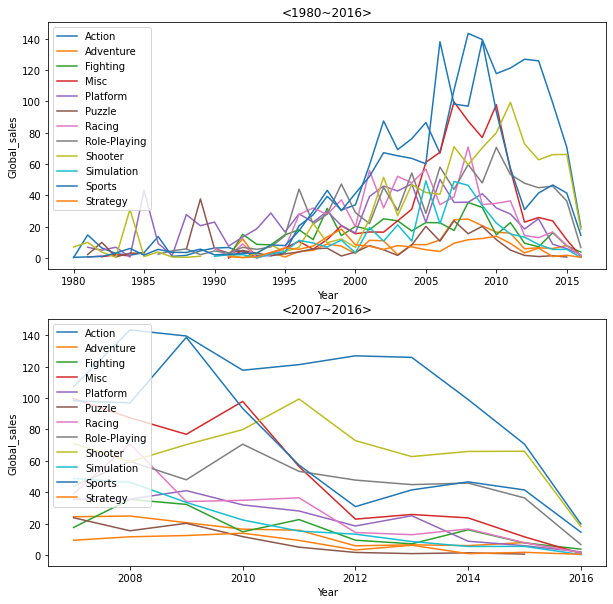

In [22]:
# 선그래프를 통해 판매량 살펴보기 (12장르)
plt.figure(figsize=(10,10))

plt.subplot(211)
plt.xlabel('Year')
plt.ylabel('Global_sales')
plt.plot(df_gy)
plt.legend(df_gy.columns)
plt.title("<1980~2016>")


plt.subplot(212)
plt.xlabel('Year')
plt.ylabel('Global_sales')
plt.plot(df_gy.index[-10:], df_gy.iloc[-10:])
plt.legend(df_gy.columns, loc = 2)
plt.title("<2007~2016>")

plt.show()

### 매년 장르별 차지하는 비중을 통해 유행 장르 파악
- 최근 Action, Shooter, Sports 가 차지하는 비중이 높다. 

In [28]:
# 판매량에서 비율로 변경 
df_gy_ratio = df_gy.copy()
year_sum = df_gy.sum(axis=1)
for i in list(df_gy.columns):
    df_gy_ratio[i] = round(df_gy_ratio[i]/year_sum * 100, 2)

df_gy_ratio.tail()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2012.0,34.45,1.62,2.59,6.23,5.04,0.47,3.92,12.97,19.79,3.63,8.39,0.90
2013.0,34.12,1.79,1.96,7.02,6.80,0.27,3.53,12.17,17.01,2.35,11.26,1.71
2014.0,29.37,1.81,4.79,7.04,2.63,0.45,4.96,13.61,19.58,1.64,13.84,0.29
2015.0,26.73,3.04,2.94,4.41,2.29,0.26,3.00,13.79,25.02,2.12,15.70,0.69
2016.0,28.01,2.55,5.43,1.62,2.93,NaN,2.36,9.52,25.64,0.55,20.64,0.73


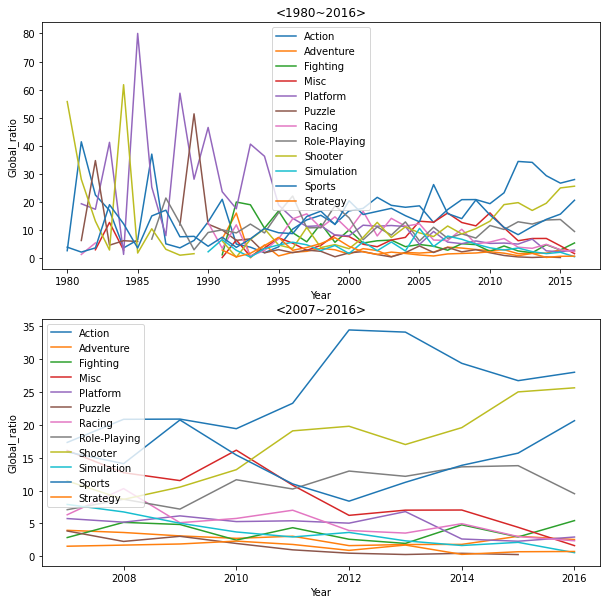

In [29]:
# 선그래프를 통해 판매량 살펴보기 (12장르)
plt.figure(figsize=(10,10))

plt.subplot(211)
plt.xlabel('Year')
plt.ylabel('Global_ratio')
plt.plot(df_gy_ratio)
plt.legend(df_gy_ratio.columns)
plt.title("<1980~2016>")


plt.subplot(212)
plt.xlabel('Year')
plt.ylabel('Global_ratio')
plt.plot(df_gy_ratio.index[-10:], df_gy_ratio.iloc[-10:])
plt.legend(df_gy_ratio.columns, loc = 2)
plt.title("<2007~2016>")

plt.show()

# 1M이 넘는 게임들은 어때?
- 전체 시장이 아닌 판매량이 1M이 넘는 게임들만 별도로 파악해 봤을 때는 Action은 감소하고 있고, Shooter와 Sports는 상승하는 모습을 보여준다. 


In [202]:
# global-sales가 1M 이상인 게임들만 추려 별도 dataframe을 만듬.

df_1m = df.copy()
df_1m = df_1m[df_1m.Glo_Sales >= 1]
df_1m_gy = df_1m.pivot_table(index='Year', columns='Genre', values = 'Glo_Sales', 
               aggfunc = 'sum')
df_1m_gy.head()

In [206]:
# 판매량을 차지하는 비율로 변경

df_1m_gy_ratio = df_1m_gy.copy()
year_sum_1m = df_1m_gy.sum(axis=1)
for i in list(df_1m_gy.columns):
    df_1m_gy_ratio[i] = round(df_1m_gy_ratio[i]/year_sum * 100, 2)

df_1m_gy_ratio.tail()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2012.0,18.90,NaN,NaN,4.31,4.48,NaN,2.37,8.74,16.58,2.47,4.38,NaN
2013.0,25.97,0.49,0.72,4.50,4.69,NaN,2.48,9.07,13.34,1.79,7.72,0.75
2014.0,17.71,NaN,3.70,4.87,2.24,0.36,3.58,8.15,15.89,1.25,9.75,NaN
2015.0,13.12,1.11,1.93,1.04,1.69,NaN,1.96,8.69,22.55,1.13,11.07,NaN
2016.0,7.07,NaN,1.50,NaN,1.67,NaN,NaN,2.20,18.23,NaN,12.32,NaN


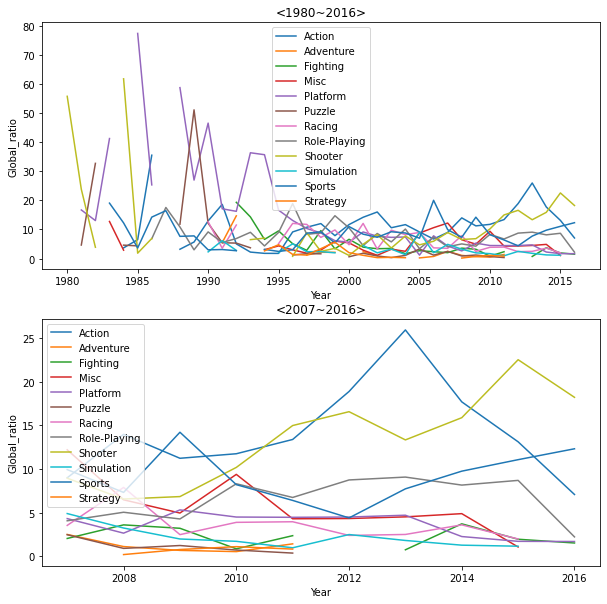

In [205]:
# 선그래프를 통해 Trend 살펴보기 (12장르)
plt.figure(figsize=(10,10))

plt.subplot(211)
plt.xlabel('Year')
plt.ylabel('Global_ratio')
plt.plot(df_1m_gy_ratio)
plt.legend(df_1m_gy_ratio.columns)
plt.title("<1980~2016>")


plt.subplot(212)
plt.xlabel('Year')
plt.ylabel('Global_ratio')
plt.plot(df_1m_gy_ratio.index[-10:], df_1m_gy_ratio.iloc[-10:])
plt.legend(df_1m_gy_ratio.columns, loc = 2)
plt.title("<2007~2016>")

plt.show()

# 나라마다 선호하는 장르가 다를까? 
## Heatmap을 통해 살펴보자. 

In [207]:
#시장별 판매량을 모아 Dataframe으로 만듬 

gNA = df.groupby('Genre').NA_Sales.sum().to_frame()
gEU = df.groupby('Genre').EU_Sales.sum().to_frame()
gJP = df.groupby('Genre').JP_Sales.sum().to_frame()
gOt = df.groupby('Genre').Other_Sales.sum().to_frame()

df_4cou = pd.merge(gNA,gEU, left_index=True, right_index=True, how = 'left')
df_4cou = pd.merge(df_4cou,gJP, left_index=True, right_index=True, how = 'left')
df_4cou = pd.merge(df_4cou,gOt, left_index=True, right_index=True, how = 'left')

df_4cou

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,873.41,524.17,159.27,187.13
Adventure,105.28,64.01,51.94,16.78
Fighting,223.00,101.20,87.15,36.65
Misc,409.44,215.87,107.69,74.69
Platform,446.15,201.45,130.53,51.50
Puzzle,122.17,50.53,56.24,12.49
Racing,358.24,237.94,56.63,77.18
Role-Playing,325.89,187.21,350.05,59.32
Shooter,580.71,312.89,38.20,102.59


In [40]:
# 시장별 규모가 다르기 때문에 시장별로 정규화를 진행 

df_4cou_ms = (df_4cou - df_4cou.min(axis = 0)) / (df_4cou.max(axis = 0) \
                                       - df_4cou.min(axis = 0))
df_4cou_ms

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,1.000000,1.000000,0.388232,1.000000
Adventure,0.045979,0.039372,0.044060,0.031166
Fighting,0.192188,0.117010,0.156966,0.144173
Misc,0.423747,0.356394,0.222831,0.360519
Platform,0.469341,0.326291,0.296072,0.228630
Puzzle,0.066956,0.011231,0.057848,0.006768
Racing,0.360156,0.402468,0.059099,0.374680
Role-Playing,0.319978,0.296564,1.000000,0.273105
Shooter,0.636465,0.558933,0.000000,0.519195


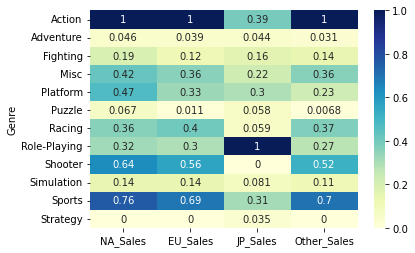

In [47]:
#heatmap으로 시장과 장르의 판매량을 파악함. 

sns.heatmap(df_4cou_ms, annot=True,  cmap="YlGnBu");

# 글로벌 2007~2016 top5 은 어떤 특징을 가지고 있을까?
- top5에 Shooter는 매해 1개 이상의 게임이 있었고, Sports, Action도 꾸준히 top5 안에 들었다. 
- Nintendo 게임을 제외하곤 multi-platform으로 게임을 출시했다. 

In [151]:
# 2007~2016년 top5인 게임을 선별

name_sales = df.pivot_table(index='Name', columns='Year', values = 'Glo_Sales', 
               aggfunc = 'sum')

year = np.arange(2007.0, 2017.0, 1)

top5s = pd.DataFrame()

for i in year:
    top5 = name_sales[i].sort_values(ascending=False)[:5].to_frame()
    top5 = top5.reset_index()
    top5.columns = ['Name', 'Glo_Sales']
    top5s = pd.concat([top5s, top5])

top5s.dropna(inplace=True)

In [210]:
# 게임 이름을 기준으로 기존 dataframe에서 자료를 추출함.

df_top5s = df[df.Name.isin(top5s_name)]
df_top5s.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Glo_Sales
120,Call of Duty 4: Modern Warfare,X360,2007.0,Shooter,Activision,5.91,2.38,0.13,0.90,9.32
129,Call of Duty 4: Modern Warfare,PC,2007.0,Shooter,Activision,0.00,1.12,0.00,0.03,1.15
144,Fallout 4,PC,2015.0,Role-Playing,Bethesda Softworks,0.50,0.63,0.00,0.10,1.23
221,Just Dance 3,Wii,2011.0,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.27
324,FIFA 15,PC,2014.0,Sports,Electronic Arts,0.00,0.27,0.00,0.03,0.30


In [208]:
# top5인 게임들의 이름, 장르, 글로벌 판매량을 알 수 있는 dataframe을 만듬. 
x = df_top5s.groupby(['Year', 'Name','Genre']).Glo_Sales.sum().reset_index()
x = x.sort_values(['Year', 'Glo_Sales'], ascending = [True, False])
x.reset_index(inplace = True)
x.head()

,index,Year,Name,Genre,Glo_Sales
0,4,2007.0,Wii Fit,Sports,22.72
1,0,2007.0,Call of Duty 4: Modern Warfare,Shooter,18.26
2,1,2007.0,Guitar Hero III: Legends of Rock,Misc,16.42
3,3,2007.0,LEGO Star Wars: The Complete Saga,Action,15.73
4,2,2007.0,Halo 3,Shooter,12.14


In [158]:
x = x.drop([35, 46, 52])

In [95]:
#2007~2016년 장르별 판매량 

x_sales = x.pivot_table(index='Genre', columns='Year', values = 'Glo_Sales', 
               aggfunc = 'sum')
x_sales

Year,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
Genre,,,,,,,,,,
Action,15.73,36.15,11.90,12.93,NaN,29.25,37.77,17.07,1.08,3.13
Fighting,NaN,13.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Misc,16.42,NaN,NaN,21.82,12.93,NaN,9.20,14.11,NaN,0.44
Platform,NaN,NaN,28.61,NaN,NaN,9.83,NaN,NaN,NaN,NaN
Racing,NaN,35.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Role-Playing,NaN,NaN,NaN,15.32,19.28,NaN,14.35,NaN,12.28,NaN
Shooter,30.40,15.88,25.10,31.04,48.21,39.49,41.41,34.50,37.00,13.19
Sports,22.72,NaN,55.00,12.55,13.14,NaN,17.16,19.02,24.44,6.90


In [160]:
# top5 게임의 장르 종류 파악 

x_cou= x.pivot_table(index='Genre', columns='Year', values = 'Name', 
               aggfunc = 'count')
x_cou = x_cou.T
x_cou

Genre,Action,Fighting,Misc,Platform,Racing,Role-Playing,Shooter,Sports
Year,,,,,,,,
2007.0,1.0,NaN,1.0,NaN,NaN,NaN,2.0,1.0
2008.0,2.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN
2009.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,2.0
2010.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0
2011.0,NaN,NaN,1.0,NaN,NaN,1.0,2.0,1.0
2012.0,2.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN
2013.0,1.0,NaN,NaN,NaN,NaN,1.0,2.0,1.0
2014.0,1.0,NaN,1.0,NaN,NaN,NaN,2.0,1.0
2015.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0


In [166]:
# 어떤 플랫폼으로 출시되었는지 파악 

df_top5s.pivot_table(index = 'Name', columns = 'Platform', values = 'Glo_Sales', aggfunc = 'count')

Platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
Name,,,,,,,,,,,,
Assassin's Creed III,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
Battlefield 3,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Battlefield 4,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
Call of Duty 4: Modern Warfare,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Call of Duty: Advanced Warfare,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
Call of Duty: Black Ops,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
Call of Duty: Black Ops 3,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
Call of Duty: Black Ops II,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
Call of Duty: Ghosts,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0


# Welch's ANOVA
- 미국 시장의 장르별 선호도를 ANOVA로 알아보고자 함. 
- ANOVA를 하기 위해선 그룹별(장르별) 등분산 가정이 충족되어야 하나, 해당 자료는 등분산성을 만족하지 못함. 
- 따라서, Welch's ANOVA를 적용함.
- 결과적으로 장르별 차이가 있다는 것을 알 수 있었으나 장르 선호도는 위에 살펴본 것과는 다르게 나옴.
    - Action이 가장 인기가 있으나 사후 검정 결과는 Shooter가 가장 높은 것으로 나옴. 이는 관측치의 수가 다르고, 장르별 분포가 오른쪽으로 매우 치우쳐 있어 정확한 결과가 나오지 못함.

In [167]:
import pingouin as pg

#Levene's test 

pg.homoscedasticity(df, dv='NA_Sales',group='Genre')

,W,pval,equal_var
levene,18.036824,2.739285e-36,False


In [169]:
#Welch's anova 
from pingouin import welch_anova
aov = welch_anova(dv='NA_Sales', between='Genre', data=df)
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,Genre,11,4969.290144,43.884692,6.201161e-92,0.015029


In [171]:
post_hoc = pg.pairwise_gameshowell(dv='NA_Sales', between='Genre', data=df)
post_hoc

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Action,Adventure,0.265797,0.082573,0.183225,0.012577,14.567804,4352.720690,5.548895e-13,0.480578
1,Action,Fighting,0.265797,0.264846,0.000952,0.020414,0.046620,1407.882906,1.000000e+00,0.001800
2,Action,Misc,0.265797,0.237357,0.028441,0.019425,1.464171,2963.719655,9.500165e-01,0.043527
3,Action,Platform,0.265797,0.508723,-0.242926,0.051916,-4.679190,943.377122,2.069758e-04,-0.177812
4,Action,Puzzle,0.265797,0.213958,0.051839,0.045768,1.132647,627.393187,9.931261e-01,0.051343
...,...,...,...,...,...,...,...,...,...,...
61,Shooter,Sports,0.447733,0.292200,0.155533,0.039872,3.900794,2371.485688,5.562986e-03,0.135090
62,Shooter,Strategy,0.447733,0.101126,0.346607,0.035435,9.781583,1579.134115,0.000000e+00,0.464061
63,Simulation,Sports,0.213157,0.292200,-0.079043,0.026966,-2.931237,3056.290096,1.304300e-01,-0.117314
64,Simulation,Strategy,0.213157,0.101126,0.112031,0.019823,5.651492,1462.163834,1.248784e-06,0.291070


In [178]:
# Games-Howell post-hoc test 진행

post_hoc[(post_hoc.A.isin(['Action','Sport','Shooter'])) & (post_hoc.pval < 0.05)]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Action,Adventure,0.265797,0.082573,0.183225,0.012577,14.567804,4352.720690,5.548895e-13,0.480578
3,Action,Platform,0.265797,0.508723,-0.242926,0.051916,-4.679190,943.377122,2.069758e-04,-0.177812
7,Action,Shooter,0.265797,0.447733,-0.181936,0.034942,-5.206831,1528.882908,1.411294e-05,-0.170716
10,Action,Strategy,0.265797,0.101126,0.164671,0.015223,10.816973,1833.862836,4.733991e-13,0.457025
60,Shooter,Simulation,0.447733,0.213157,0.234576,0.037177,6.309685,1817.046847,2.307116e-08,0.278153
61,Shooter,Sports,0.447733,0.292200,0.155533,0.039872,3.900794,2371.485688,5.562986e-03,0.135090
62,Shooter,Strategy,0.447733,0.101126,0.346607,0.035435,9.781583,1579.134115,0.000000e+00,0.464061


In [179]:
df_na = df[df.NA_Sales > 0]

In [187]:
xyz = df_na.groupby(['Genre', 'Year']).Name.count().reset_index()
xyz[xyz.Genre.isin(['Action', 'Shooter', 'Sports'])]

,Genre,Year,Name
0,Action,1980.0,1
1,Action,1981.0,25
2,Action,1982.0,18
3,Action,1983.0,7
4,Action,1984.0,1
...,...,...,...
339,Sports,2012.0,39
340,Sports,2013.0,30
341,Sports,2014.0,41
342,Sports,2015.0,41


In [191]:
print('Action: ',xyz[xyz.Genre == 'Action'].Name.sum())
print('Sports: ',xyz[xyz.Genre == 'Sports'].Name.sum())
print('Shooter: ',xyz[xyz.Genre == 'Shooter'].Name.sum())

Action:  2560
Sports:  1842
Shooter:  1137
